In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Hadoop File system 을 다룰 수 있는 패키지 - 프로그램적으로 hdfs에 접근해서 파일 저장 및 삭제 등
# !pip install hdfs
# 14번 노트에서 할거랬는데 난 이미 설치함 ㅎㅎ;

In [2]:
from datetime import date, datetime
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F

In [3]:
cdf = spark.read.csv('/dataframe/a_class_info.csv',header=True)

## Set Operation

- 집합연산
    - union : 합집합, 결과집합에서 중복되는 행 제거하지 않음
    - unionAll : 2.0버전이후 union으로 대체됨, union과 동일한 함수
    - exceptAll : 차집합
    - intersect : 교집합, 결과집합에서 중복되는 행 제거
    - intersectAll : 교집합, 결과집합에서 중복되는 행 제거하지 않음
    

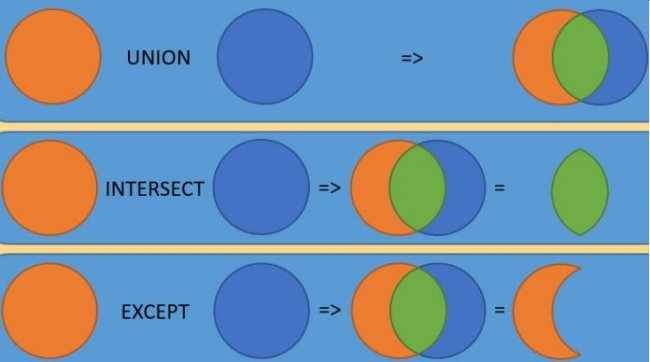
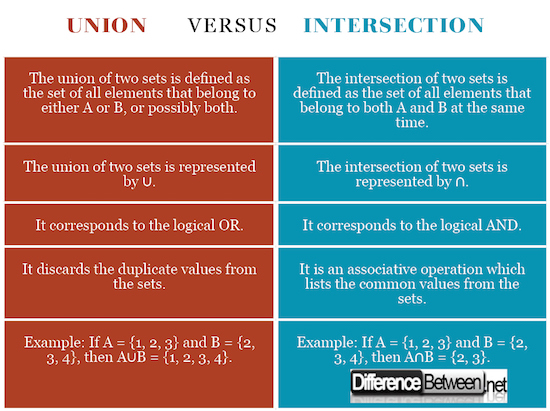

### union, unionAll
- 합집합

In [10]:
# 학생 수가 30명 초과인 반과, 학생 수가 16명 미만인 합집합을 구해보자
cdf.where(cdf.class_std_cnt > 30)\
    .union(
        cdf.where(cdf.class_std_cnt < 16)
    ).show()

# .union이나 .unionAll 사용 가능
# or 연산자로도 할 수 있다 (순서는 다르지만)
# 논리연산 or는 수학 집합의 합집합과 같다
cdf.where((cdf.class_std_cnt > 30) | (cdf.class_std_cnt < 16)).show()

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     18K| GOOBU|           31|   Urban|     Public|     Standard|
|     IQN| CCAAW|           15|Suburban| Non-public| Experimental|
|     197| FBUMG|           14|   Rural| Non-public| Experimental|
|     JGD| FBUMG|           14|   Rural| Non-public| Experimental|
|     MDE|  NULL|           10|   Rural| Non-public| Experimental|
|     SSP| UUUQX|           15|Suburban| Non-public|     Standard|
|     KR1| VHDHF|           15|   Rural| Non-public| Experimental|
+--------+------+-------------+--------+-----------+-------------+

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     IQN| CCAAW|           15|Suburban| Non-public| Experime

### intersect, intersectAll
- 교집합

In [4]:
# intersect와 intersectAll의 차이를 확인하기 위해 중복데이터를 추가하여 새로운 DF로 생성
temp = cdf.collect()
# temp ==> 확인했더니 Row 객체들의 리스트네. DF에 데이터 추가하려면 Row 객체로 넣어도 되고 딕셔너리로 넣어도 된다.
temp.append({
    'class_cd':'A33'
    ,'school':'CIMBB'
    ,'class_std_cnt':'19'
    ,'loc':'Urban'
    ,'school_type':'Non-public'
    ,'teaching_type':'Standard'    
})

temp_df = spark.createDataFrame(temp)
temp_df

DataFrame[class_cd: string, school: string, class_std_cnt: string, loc: string, school_type: string, teaching_type: string]

In [9]:
# 학교이름이 C로 시작하는 클래스와 학교 위치가 도시인 클래스간의 교집합을 구하시오
# temp_df.where(col('school').like('C%')).show(2)
# temp_df.where(col('loc') == 'Urban').show(2)
        # 이 두개의 교집합 구하기

# temp_df.where(col('school').like('C%'))\
#         .intersect(
#             temp_df.where(col('loc') == 'Urban'))\
# .show()

# intersect 모듈에 인수로 교집합 할 애를 전달
# 위의 코드로도 충분하지만 학교명 기준 오름차순 진행 process 추가
temp_df.where(col('school').like('C%'))\
        .intersect(
            temp_df.where(col('loc') == 'Urban'))\
.orderBy(temp_df.class_cd)\
.show()

# 논리연산자 and는 수학집합의 교집합 개념 == where절로 intersect 구현 가능
# intersect는 중복 데이터가 출력됨
# 중복제거를 위해서는 distinct()라는 메서드 추가해야함
temp_df\
.distinct()\
.where((col('school').like('C%')) & (col('loc') == 'Urban'))\
.orderBy(temp_df.class_cd).show()

+--------+------+-------------+-----+-----------+-------------+
|class_cd|school|class_std_cnt|  loc|school_type|teaching_type|
+--------+------+-------------+-----+-----------+-------------+
|     1Q1| CUQAM|           28|Urban|     Public|     Standard|
|     A33| CIMBB|           19|Urban| Non-public|     Standard|
|     BFY| CUQAM|           27|Urban|     Public|     Standard|
|     EID| CIMBB|           21|Urban| Non-public|     Standard|
|     HUJ| CIMBB|           17|Urban| Non-public| Experimental|
|     OMI| CUQAM|           28|Urban|     Public|     Standard|
|     PC6| CIMBB|           17|Urban| Non-public|     Standard|
|     X6Z| CUQAM|           24|Urban|     Public| Experimental|
+--------+------+-------------+-----+-----------+-------------+



[Stage 24:>                                                         (0 + 2) / 2]

+--------+------+-------------+-----+-----------+-------------+
|class_cd|school|class_std_cnt|  loc|school_type|teaching_type|
+--------+------+-------------+-----+-----------+-------------+
|     1Q1| CUQAM|           28|Urban|     Public|     Standard|
|     A33| CIMBB|           19|Urban| Non-public|     Standard|
|     BFY| CUQAM|           27|Urban|     Public|     Standard|
|     EID| CIMBB|           21|Urban| Non-public|     Standard|
|     HUJ| CIMBB|           17|Urban| Non-public| Experimental|
|     OMI| CUQAM|           28|Urban|     Public|     Standard|
|     PC6| CIMBB|           17|Urban| Non-public|     Standard|
|     X6Z| CUQAM|           24|Urban|     Public| Experimental|
+--------+------+-------------+-----+-----------+-------------+



In [5]:
# intersectAll은 중복데이터를 제거하지 않음
temp_df.where(col('school').like('C%'))\
        .intersectAll(
            temp_df.where(col('loc') == 'Urban'))\
.orderBy(temp_df.class_cd)\
.show()


temp_df\
.where((col('school').like('C%')) & (col('loc') == 'Urban'))\
.orderBy(temp_df.class_cd).show()

+--------+------+-------------+-----+-----------+-------------+
|class_cd|school|class_std_cnt|  loc|school_type|teaching_type|
+--------+------+-------------+-----+-----------+-------------+
|     1Q1| CUQAM|           28|Urban|     Public|     Standard|
|     A33| CIMBB|           19|Urban| Non-public|     Standard|
|     A33| CIMBB|           19|Urban| Non-public|     Standard|
|     BFY| CUQAM|           27|Urban|     Public|     Standard|
|     EID| CIMBB|           21|Urban| Non-public|     Standard|
|     HUJ| CIMBB|           17|Urban| Non-public| Experimental|
|     OMI| CUQAM|           28|Urban|     Public|     Standard|
|     PC6| CIMBB|           17|Urban| Non-public|     Standard|
|     X6Z| CUQAM|           24|Urban|     Public| Experimental|
+--------+------+-------------+-----+-----------+-------------+



[Stage 5:=============================>                             (1 + 1) / 2]

+--------+------+-------------+-----+-----------+-------------+
|class_cd|school|class_std_cnt|  loc|school_type|teaching_type|
+--------+------+-------------+-----+-----------+-------------+
|     1Q1| CUQAM|           28|Urban|     Public|     Standard|
|     A33| CIMBB|           19|Urban| Non-public|     Standard|
|     A33| CIMBB|           19|Urban| Non-public|     Standard|
|     BFY| CUQAM|           27|Urban|     Public|     Standard|
|     EID| CIMBB|           21|Urban| Non-public|     Standard|
|     HUJ| CIMBB|           17|Urban| Non-public| Experimental|
|     OMI| CUQAM|           28|Urban|     Public|     Standard|
|     PC6| CIMBB|           17|Urban| Non-public|     Standard|
|     X6Z| CUQAM|           24|Urban|     Public| Experimental|
+--------+------+-------------+-----+-----------+-------------+



### exceptAll
- 차집합

In [8]:
# 학교이름이 C로 시작하는 클래스와 학교 위치가 도시인 클래스간의 차집합을 구하시오
temp_df.where(col('school').like('C%')).show()
temp_df.where(col('school').like('C%'))\
.exceptAll(
    temp_df.where(temp_df.loc == 'Urban')
).orderBy(temp_df.school).show()

# 차집합은 xor 논리연산과 동일하나 spark 에서는 xor연산자가 지원되지 않음
# xor : 두 개의 명제 중 하나만 참인경우 참
# 논리연산자 사용할 수 없고 위 코드처럼 exceptAll 활용해서 조건이 참인 레코드를 제외시켜서 최종 데이터를 출력해야한다.

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     2B1| CCAAW|           18|Suburban| Non-public| Experimental|
|     EPS| CCAAW|           20|Suburban| Non-public| Experimental|
|     IQN| CCAAW|           15|Suburban| Non-public| Experimental|
|     PGK| CCAAW|           21|Suburban| Non-public|     Standard|
|     UHU| CCAAW|           16|Suburban| Non-public| Experimental|
|     UWK| CCAAW|           19|Suburban| Non-public|     Standard|
|     A33| CIMBB|           19|   Urban| Non-public|     Standard|
|     EID| CIMBB|           21|   Urban| Non-public|     Standard|
|     HUJ| CIMBB|           17|   Urban| Non-public| Experimental|
|     PC6| CIMBB|           17|   Urban| Non-public|     Standard|
|     1Q1| CUQAM|           28|   Urban|     Public|     Standard|
|     BFY| CUQAM|           27|   Urban|     Public|     Stand

[Stage 12:===========================================>              (3 + 1) / 4]

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     IQN| CCAAW|           15|Suburban| Non-public| Experimental|
|     PGK| CCAAW|           21|Suburban| Non-public|     Standard|
|     EPS| CCAAW|           20|Suburban| Non-public| Experimental|
|     UWK| CCAAW|           19|Suburban| Non-public|     Standard|
|     UHU| CCAAW|           16|Suburban| Non-public| Experimental|
|     2B1| CCAAW|           18|Suburban| Non-public| Experimental|
+--------+------+-------------+--------+-----------+-------------+

